In [22]:
import pandas as pd
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# API endpoint URL
api_url = 'https://healthdata.gov/resource/9psv-r5iz.json'

In [3]:
# Send GET request to the API endpoint

response = requests.get(api_url)


In [4]:
    json_data = response.json()

In [18]:
df = pd.DataFrame(json_data)

TypeError: DataFrame.__init__() got an unexpected keyword argument 'usecols'

In [6]:
df.shape

(53, 134)

In [7]:
df.describe()

,state,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
count,53,53,53,53,53,53,53,53,53,53,...,52,53,53,53,53,53,53,53,53,53
unique,53,11,28,45,21,44,27,21,46,53,...,4,46,3,47,7,48,45,48,47,48
top,AK,0,0,70,2,10,8,1,92,1154,...,0,15,0,32,0,40,4,91,8,91
freq,1,24,8,3,10,2,7,10,3,1,...,48,2,47,2,34,3,2,2,2,2


In [8]:
df.dtypes

state                                                      object
critical_staffing_shortage_today_yes                       object
critical_staffing_shortage_today_no                        object
critical_staffing_shortage_today_not_reported              object
critical_staffing_shortage_anticipated_within_week_yes     object
                                                            ...  
staffed_icu_pediatric_patients_confirmed_covid_coverage    object
staffed_pediatric_icu_bed_occupancy                        object
staffed_pediatric_icu_bed_occupancy_coverage               object
total_staffed_pediatric_icu_beds                           object
total_staffed_pediatric_icu_beds_coverage                  object
Length: 134, dtype: object

In [9]:
df.columns

Index(['state', 'critical_staffing_shortage_today_yes',
       'critical_staffing_shortage_today_no',
       'critical_staffing_shortage_today_not_reported',
       'critical_staffing_shortage_anticipated_within_week_yes',
       'critical_staffing_shortage_anticipated_within_week_no',
       'critical_staffing_shortage_anticipated_within_week_not_reported',
       'hospital_onset_covid', 'hospital_onset_covid_coverage',
       'inpatient_beds',
       ...
       'previous_day_admission_pediatric_covid_confirmed_5_11',
       'previous_day_admission_pediatric_covid_confirmed_5_11_coverage',
       'previous_day_admission_pediatric_covid_confirmed_unknown',
       'previous_day_admission_pediatric_covid_confirmed_unknown_coverage',
       'staffed_icu_pediatric_patients_confirmed_covid',
       'staffed_icu_pediatric_patients_confirmed_covid_coverage',
       'staffed_pediatric_icu_bed_occupancy',
       'staffed_pediatric_icu_bed_occupancy_coverage',
       'total_staffed_pediatric_icu

In [10]:
df.isnull().sum()

state                                                      0
critical_staffing_shortage_today_yes                       0
critical_staffing_shortage_today_no                        0
critical_staffing_shortage_today_not_reported              0
critical_staffing_shortage_anticipated_within_week_yes     0
                                                          ..
staffed_icu_pediatric_patients_confirmed_covid_coverage    0
staffed_pediatric_icu_bed_occupancy                        0
staffed_pediatric_icu_bed_occupancy_coverage               0
total_staffed_pediatric_icu_beds                           0
total_staffed_pediatric_icu_beds_coverage                  0
Length: 134, dtype: int64

In [11]:
df = df.dropna()

In [12]:
df = df.drop_duplicates()

In [13]:
numeric_columns = df.select_dtypes(include=np.number)

In [14]:
for column in numeric_columns.columns:
    df[column] = df[column].astype(int)

In [16]:
df['staffed_pediatric_icu_bed_occupancy_coverage'].dtype

dtype('O')

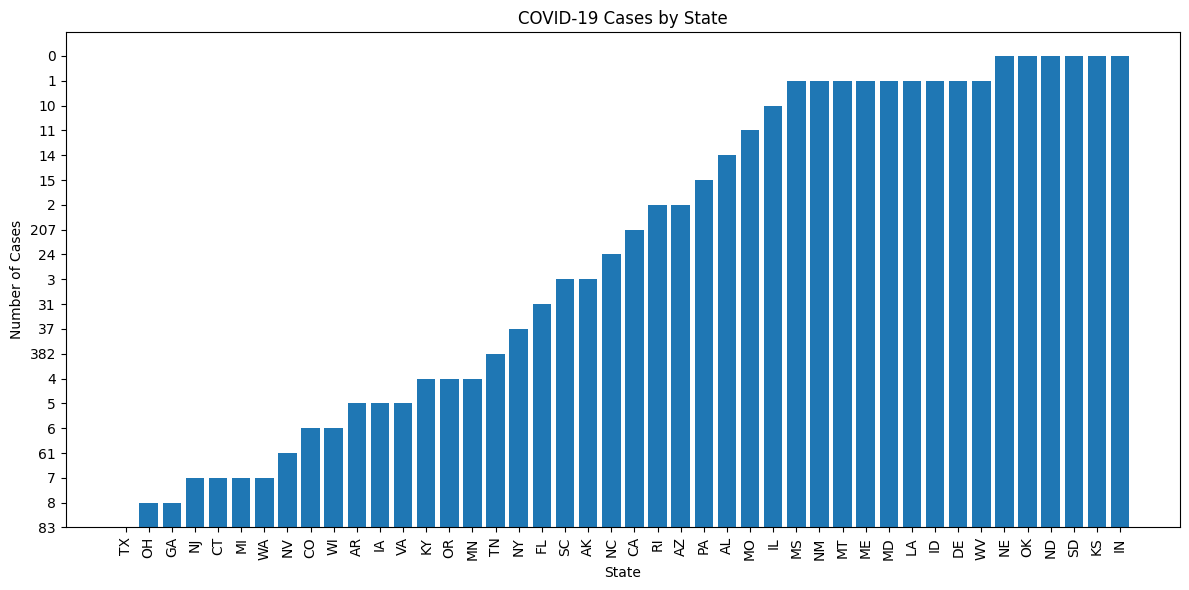

In [23]:
cases_by_state = df.groupby('state')['hospital_onset_covid'].sum().reset_index()
cases_by_state = cases_by_state.sort_values('hospital_onset_covid', ascending=False)
plt.figure(figsize=(12, 6b))
plt.bar(cases_by_state['state'], cases_by_state['hospital_onset_covid'])
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [38]:
cases_by_state

,state,hospital_onset_covid
39,TX,83
31,OH,8
9,GA,8
27,NJ,7
6,CT,7
19,MI,7
41,WA,7
29,NV,61
5,CO,6
42,WI,6


In [27]:
beds_used_per_state = df.groupby('inpatient_beds_used')['adult_icu_bed_covid_utilization'].sum()
print(beds_used_per_state)

inpatient_beds_used
10919     0.007860752386299831
11475      0.03417634996582365
12335    0.0055891942244993015
1235                       0.0
1288                       0.0
1323                       0.0
13967     0.025089605734767026
14183     0.005847953216374269
15315     0.011957484499557131
16100      0.04674698795180723
16685      0.01174089068825911
1741      0.022935779816513763
1768                       0.0
1843     0.0064516129032258064
1924      0.017543859649122806
20077     0.010523321956769055
21226     0.009073842302878598
2380      0.012048192771084338
2997      0.002352941176470588
33769      0.01783754116355653
35203     0.014557217953902144
3731     0.0017452006980802793
4019       0.04831932773109244
4045      0.010401188707280832
41180      0.02057538237436271
42712      0.01872852233676976
4304      0.008849557522123894
4306      0.007707129094412331
4406      0.009029345372460496
4571      0.024251069900142655
4859       0.02063273727647868
4976       0.017520

In [37]:
state_data = df.groupby('state')[['critical_staffing_shortage_today_yes', 'deaths_covid']].sum()
state_data

,critical_staffing_shortage_today_yes,deaths_covid
state,,
AK,1,0
AL,1,0
AR,1,0
AZ,0,0
CA,10,8
CO,0,0
CT,0,0
DE,1,0
FL,3,12


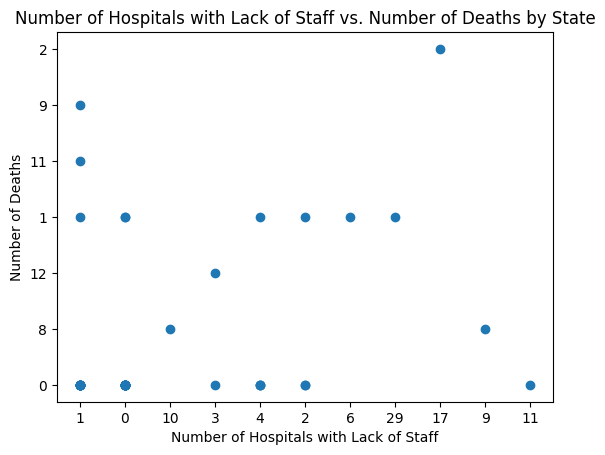

In [34]:
plt.scatter(state_data['critical_staffing_shortage_today_yes'], state_data['deaths_covid'])
plt.xlabel('Number of Hospitals with Lack of Staff')
plt.ylabel('Number of Deaths')
plt.title('Number of Hospitals with Lack of Staff vs. Number of Deaths by State')
plt.show()